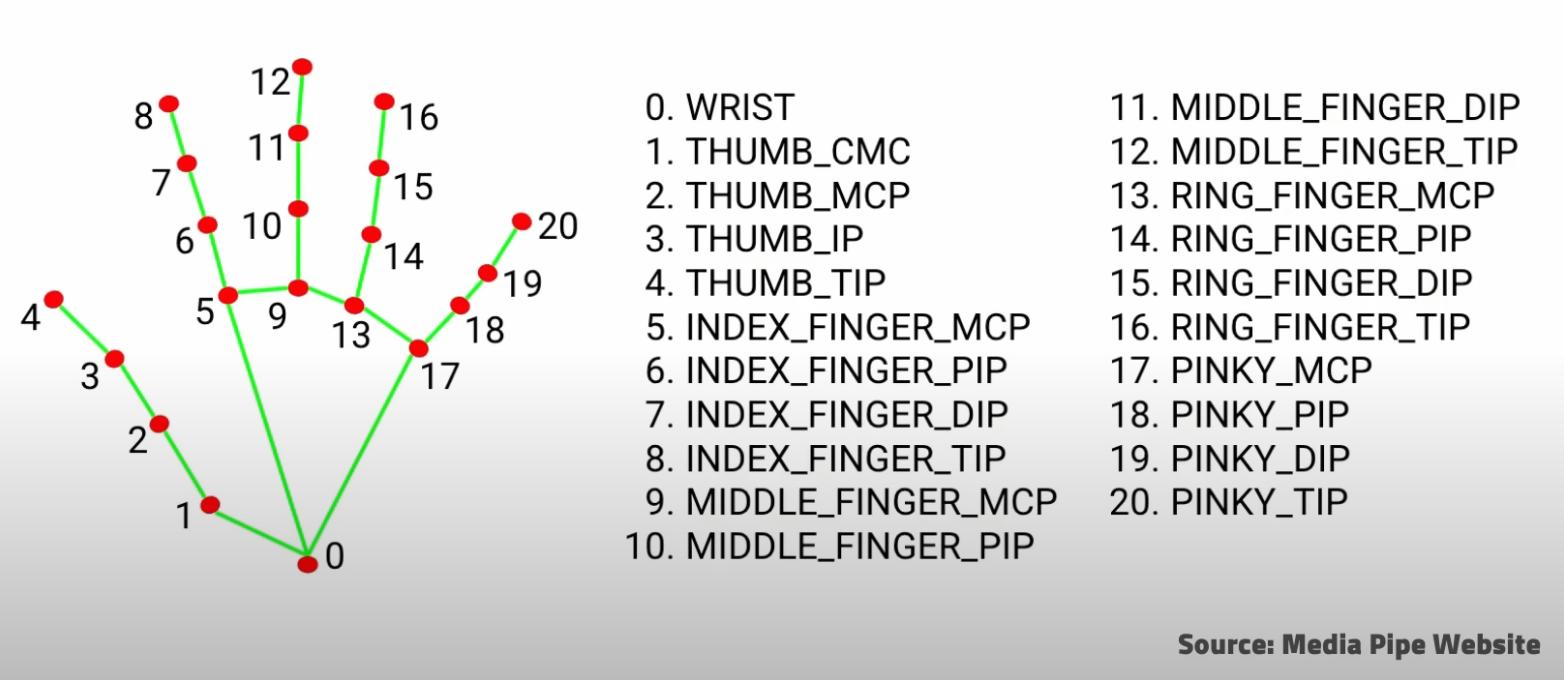

Vamos a utilizar la libreria pyautogui para poder manejar el ratón

Combinandola con el handtracking, podremos mover el raton con movimientos de la mano

In [ ]:
import pyautogui

pyautogui.moveTo(500, 500)  # Mover cursor
pyautogui.moveTo(200, 700)  # Mover cursor
pyautogui.moveTo(700, 200)  # Mover cursor
pyautogui.click()  # Clic izquierdo

----

In [12]:
import cv2 
import mediapipe as mp
import pyautogui
import numpy as np
import time

In [16]:
cap = cv2.VideoCapture(0) # Conseguimos nuestra camara

# Establecer dimensiones deseadas para la cámara
width = 640
height = 360
cap.set(3, width)  # Establece el ancho de la imagen
cap.set(4, height)  # Establece la altura de la imagen

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

# Obtener tamaño de la pantalla
screen_width, screen_height = pyautogui.size()

# Clicks
clicking = False  # Estado del click
click_start_time = 0  # Tiempo de inicio del click

# Funcion para mover el mouse en funcion en un landmark
def move_mouse(lm):
    global width, height  # Dimensiones de la cámara
    
    # Convertir coordenadas normalizadas de Mediapipe (0-1) a píxeles
    x = int(lm.x * width)
    y = int(lm.y * height)
    
    # Dibujar un círculo rojo en indice
    cv2.circle(img, (x, y), 5, (255, 0, 0), -1)
    
    # Invertir los ejes X y Y
    x = width - x
    
    # Escalar a la resolución de la pantalla
    screen_x = int((x / width) * screen_width)
    screen_y = int((y / height) * screen_height)
    
    # Mover el mouse
    pyautogui.moveTo(screen_x, screen_y, duration=0.1)

# Funcion para detectar las acciones del click izq. Mantener y Clickar
def left_click(lm1, lm2, tolerance = 0.03):
    global clicking, click_start_time
    
   # Verificar si los dedos están lo suficientemente cerca
    if abs(lm1.x - lm2.x) < tolerance and abs(lm1.y - lm2.y) < tolerance:
        if not clicking:
            clicking = True
            click_start_time = time.time()  # Iniciar temporizador
            pyautogui.click()  # Presionar botón izquierdo
        
        # Si ha pasado más de 0.2s, mantener el clic
        elif time.time() - click_start_time > 0.2:
            pyautogui.mouseDown()
        
        # Dibujar un círculo azul en el pulgar mientras se mantiene el clic
        x = int(lm2.x * width)
        y = int(lm2.y * height)
        cv2.circle(img, (x, y), 5, (255, 0, 0), -1)  # Azul en BGR
    
    else:
        if clicking:
            clicking = False
            pyautogui.mouseUp()  # Soltar el botón izquierdo
while True:
    succes, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(imgRGB) 
    #print(result.multi_hand_landmarks) # Nos da las coordenadas del resultado encontrado, en nuestro caso, la mano
    
    # Puede haber mas de una mano, por lo que las separamos para mostrarlas
    if result.multi_hand_landmarks:
        for hand in result.multi_hand_landmarks:
            lm = hand.landmark
            move_mouse(lm[8]) # Mover el mouse con el indice
            left_click(lm[8], lm[4]) # Clickar al juntar indice y pulgar
            
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:  # Presionar 'Esc' para salir
        break
    
cap.release()
cv2.destroyAllWindows()

Hay un gran problema y es que ejecuta el click izquierdo muchas veces por lo que se reincia constantemente